In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
world_url = 'https://www.worldometers.info/coronavirus/'
india_url = 'https://www.mohfw.gov.in/'

## Web Scrapping the World Dataset

In [3]:
response = requests.get(world_url)
print(response)

<Response [200]>


In [4]:
soup = BeautifulSoup(response.content,'html.parser')
soup.title

<title>Coronavirus Update (Live): 9,560,837 Cases and 485,622 Deaths from COVID-19 Virus Pandemic - Worldometer</title>

In [5]:
divs = soup.find('div',class_='panel_flip')
for i in divs.find_all('div',class_='panel_front'):
    print(i.text)


3,874,480
Currently Infected Patients


3,816,315 (98%)
in Mild Condition

58,165 (2%)
Serious or Critical


Show Graph



In [6]:
coronatable = soup.find_all('table')

In [7]:
ct = coronatable[0]

In [8]:
country = []
total_cases = []
new_cases = []
total_deaths = []
new_deaths = []
total_recovered = []
active_cases = []
rows = ct.find_all('tr')[9:-8]
for row in rows:
    col = row.find_all('td')
    country.append(col[1].text.strip())
    total_cases.append(col[2].text.strip().replace(',',''))
    new_cases.append(col[3].text.strip().replace(',','').replace('+',''))
    total_deaths.append(col[4].text.strip().replace(',',''))
    new_deaths.append(col[5].text.strip().replace(',','').replace('+',''))
    total_recovered.append(col[6].text.strip().replace(',',''))
    active_cases.append(col[8].text.strip().replace(',','').replace('+',''))
    
print(country)
print(active_cases)

['USA', 'Brazil', 'Russia', 'India', 'UK', 'Spain', 'Peru', 'Chile', 'Italy', 'Iran', 'Mexico', 'Germany', 'Pakistan', 'Turkey', 'Saudi Arabia', 'France', 'Bangladesh', 'South Africa', 'Canada', 'Qatar', 'Colombia', 'Sweden', 'Belgium', 'Belarus', 'Egypt', 'Ecuador', 'Indonesia', 'Argentina', 'Netherlands', 'UAE', 'Kuwait', 'Singapore', 'Portugal', 'Ukraine', 'Iraq', 'Oman', 'Poland', 'Philippines', 'Switzerland', 'Afghanistan', 'Dominican Republic', 'Panama', 'Bolivia', 'Ireland', 'Romania', 'Bahrain', 'Armenia', 'Israel', 'Nigeria', 'Kazakhstan', 'Japan', 'Austria', 'Moldova', 'Ghana', 'Guatemala', 'Honduras', 'Azerbaijan', 'Serbia', 'Denmark', 'Cameroon', 'S. Korea', 'Algeria', 'Morocco', 'Nepal', 'Czechia', 'Sudan', 'Norway', 'Malaysia', 'Ivory Coast', 'Australia', 'Finland', 'Uzbekistan', 'Senegal', 'DRC', 'Tajikistan', 'North Macedonia', 'Haiti', 'El Salvador', 'Kenya', 'Guinea', 'Ethiopia', 'Gabon', 'Djibouti', 'Venezuela', 'Bulgaria', 'Luxembourg', 'Hungary', 'Kyrgyzstan', 'Bos

In [9]:
world_df = pd.DataFrame(list(zip(country,new_cases, active_cases, total_recovered, new_deaths, total_deaths, total_cases)),
                  columns = ['Country','NewCases','ActiveCases','TotalRecovered','NewDeaths','TotalDeaths','TotalCases'])

In [10]:
world_df.head(20)

,Country,NewCases,ActiveCases,TotalRecovered,NewDeaths,TotalDeaths,TotalCases
0,USA,884,1298536,1040608,13,124294,2463438
1,Brazil,1135,489806,649908,21,53895,1193609
2,Russia,7113,230225,375164,92,8605,613994
3,India,1600,187288,272382,8,14915,474585
4,UK,,N/A,N/A,,43081,306862
5,Spain,,N/A,N/A,,28327,294166
6,Peru,,104514,151589,,8586,264689
7,Chile,,34592,215093,,4731,254416
8,Italy,,18655,186111,,34644,239410
9,Iran,2595,29863,175103,134,10130,215096


## Data Cleaning on World Data

In [11]:
world_df.dtypes

Country           object
NewCases          object
ActiveCases       object
TotalRecovered    object
NewDeaths         object
TotalDeaths       object
TotalCases        object
dtype: object

In [12]:
# Check for duplicated rows in the Country column

world_df.Country.duplicated().sum()

0

In [13]:
# Check for null values
world_df.isnull().sum()

Country           0
NewCases          0
ActiveCases       0
TotalRecovered    0
NewDeaths         0
TotalDeaths       0
TotalCases        0
dtype: int64

In [14]:
# It can be seen from the dataset that it does have missing values
# Handling missing values by replacing them with NaN

world_df.replace(r'^\s*$', np.nan, regex=True, inplace=True)
world_df.replace('N/A', np.nan, inplace=True)
world_df

,Country,NewCases,ActiveCases,TotalRecovered,NewDeaths,TotalDeaths,TotalCases
0,USA,884,1298536,1040608,13,124294,2463438
1,Brazil,1135,489806,649908,21,53895,1193609
2,Russia,7113,230225,375164,92,8605,613994
3,India,1600,187288,272382,8,14915,474585
4,UK,NaN,NaN,NaN,NaN,43081,306862
5,Spain,NaN,NaN,NaN,NaN,28327,294166
6,Peru,NaN,104514,151589,NaN,8586,264689
7,Chile,NaN,34592,215093,NaN,4731,254416
8,Italy,NaN,18655,186111,NaN,34644,239410
9,Iran,2595,29863,175103,134,10130,215096


In [15]:
# Finding the number of NaN values in the dataset

world_df.isna().sum()

Country             0
NewCases          146
ActiveCases         4
TotalRecovered      5
NewDeaths         175
TotalDeaths        30
TotalCases          0
dtype: int64

In [16]:
# Missing values in NewCases and New Deaths can be filled with zeros 

world_df.NewCases.replace(np.nan,0,inplace=True)
world_df.NewDeaths.replace(np.nan,0,inplace=True)

In [17]:
world_df

,Country,NewCases,ActiveCases,TotalRecovered,NewDeaths,TotalDeaths,TotalCases
0,USA,884,1298536,1040608,13,124294,2463438
1,Brazil,1135,489806,649908,21,53895,1193609
2,Russia,7113,230225,375164,92,8605,613994
3,India,1600,187288,272382,8,14915,474585
4,UK,0,NaN,NaN,0,43081,306862
5,Spain,0,NaN,NaN,0,28327,294166
6,Peru,0,104514,151589,0,8586,264689
7,Chile,0,34592,215093,0,4731,254416
8,Italy,0,18655,186111,0,34644,239410
9,Iran,2595,29863,175103,134,10130,215096


In [18]:
world_df.isna().sum()

Country            0
NewCases           0
ActiveCases        4
TotalRecovered     5
NewDeaths          0
TotalDeaths       30
TotalCases         0
dtype: int64

In [19]:
# For ActiveCase, TotalRecovered and TotalDeaths 
# The missing values can be replaced using the expression : 
# TotalCases = ActiveCases + TotalRecovered + TotalDeaths

for i in world_df.index:
    if world_df.ActiveCases[i] is np.nan:
        if world_df.TotalRecovered[i] is np.nan or world_df.TotalDeaths[i] is np.nan:
            world_df.ActiveCases[i] = 0 + int(world_df.NewCases[i])
        else:
            world_df.ActiveCases[i] = int(world_df.TotalCases[i]) + int(world_df.NewCases[i]) - int(world_df.TotalDeaths[i]) - int(world_df.TotalRecovered[i])
    if world_df.TotalRecovered[i] is np.nan:
        if world_df.TotalDeaths[i] is np.nan:
            world_df.TotalRecovered[i] = 0
        else:
            world_df.TotalRecovered[i] = int(world_df.TotalCases[i]) - int(world_df.TotalDeaths[i]) - int(world_df.ActiveCases[i])
            
    if world_df.TotalDeaths[i] is np.nan:
        world_df.TotalDeaths[i] = int(world_df.TotalCases[i]) + int(world_df.NewDeaths[i]) - int(world_df.ActiveCases[i]) - int(world_df.TotalRecovered[i])

In [20]:
world_df.head(20)

,Country,NewCases,ActiveCases,TotalRecovered,NewDeaths,TotalDeaths,TotalCases
0,USA,884,1298536,1040608,13,124294,2463438
1,Brazil,1135,489806,649908,21,53895,1193609
2,Russia,7113,230225,375164,92,8605,613994
3,India,1600,187288,272382,8,14915,474585
4,UK,0,0,263781,0,43081,306862
5,Spain,0,0,265839,0,28327,294166
6,Peru,0,104514,151589,0,8586,264689
7,Chile,0,34592,215093,0,4731,254416
8,Italy,0,18655,186111,0,34644,239410
9,Iran,2595,29863,175103,134,10130,215096


In [21]:
# Check if there are anymore missing values

world_df.isna().sum()

Country           0
NewCases          0
ActiveCases       0
TotalRecovered    0
NewDeaths         0
TotalDeaths       0
TotalCases        0
dtype: int64

In [22]:
# Convert all columns except Country into int to aid further calculations

world_df.NewCases = world_df.NewCases.astype(int)
world_df.ActiveCases = world_df.ActiveCases.astype(int)
world_df.TotalRecovered = world_df.TotalRecovered.astype(int)
world_df.NewDeaths = world_df.NewDeaths.astype(int)
world_df.TotalDeaths = world_df.TotalDeaths.astype(int)
world_df.TotalCases = world_df.TotalCases.astype(int)

In [23]:
world_df.dtypes

Country           object
NewCases           int32
ActiveCases        int32
TotalRecovered     int32
NewDeaths          int32
TotalDeaths        int32
TotalCases         int32
dtype: object

In [24]:
world_df

,Country,NewCases,ActiveCases,TotalRecovered,NewDeaths,TotalDeaths,TotalCases
0,USA,884,1298536,1040608,13,124294,2463438
1,Brazil,1135,489806,649908,21,53895,1193609
2,Russia,7113,230225,375164,92,8605,613994
3,India,1600,187288,272382,8,14915,474585
4,UK,0,0,263781,0,43081,306862
5,Spain,0,0,265839,0,28327,294166
6,Peru,0,104514,151589,0,8586,264689
7,Chile,0,34592,215093,0,4731,254416
8,Italy,0,18655,186111,0,34644,239410
9,Iran,2595,29863,175103,134,10130,215096


## Data Analysis

In [25]:
world_df.describe()

,NewCases,ActiveCases,TotalRecovered,NewDeaths,TotalDeaths,TotalCases
count,215.000000,2.150000e+02,2.150000e+02,215.000000,215.000000,2.150000e+02
mean,192.348837,1.604599e+04,2.616432e+04,7.734884,2258.706977,4.446901e+04
std,768.537417,9.696579e+04,9.657111e+04,66.290492,10486.785981,1.981742e+05
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000e+00
25%,0.000000,1.450000e+01,1.580000e+02,0.000000,7.000000,2.390000e+02
50%,0.000000,3.960000e+02,1.088000e+03,0.000000,38.000000,1.829000e+03
75%,8.000000,3.655000e+03,1.013700e+04,0.000000,333.000000,1.504550e+04
max,7113.000000,1.298536e+06,1.040608e+06,947.000000,124294.000000,2.463438e+06


Drop 'NewCases' and 'NewDeaths' from the main dataframe as they are daily data and all other columns are cumulative data.

In [26]:
world_df = world_df.drop(columns=['NewDeaths', 'NewCases'])

In [27]:
world_df.sort_values(by=['TotalCases'],ascending=False,inplace=True)
world_df.head(30)

,Country,ActiveCases,TotalRecovered,TotalDeaths,TotalCases
0,USA,1298536,1040608,124294,2463438
1,Brazil,489806,649908,53895,1193609
2,Russia,230225,375164,8605,613994
3,India,187288,272382,14915,474585
4,UK,0,263781,43081,306862
5,Spain,0,265839,28327,294166
6,Peru,104514,151589,8586,264689
7,Chile,34592,215093,4731,254416
8,Italy,18655,186111,34644,239410
9,Iran,29863,175103,10130,215096


In [28]:
world_df_m = world_df.head(20)
world_df_m

,Country,ActiveCases,TotalRecovered,TotalDeaths,TotalCases
0,USA,1298536,1040608,124294,2463438
1,Brazil,489806,649908,53895,1193609
2,Russia,230225,375164,8605,613994
3,India,187288,272382,14915,474585
4,UK,0,263781,43081,306862
5,Spain,0,265839,28327,294166
6,Peru,104514,151589,8586,264689
7,Chile,34592,215093,4731,254416
8,Italy,18655,186111,34644,239410
9,Iran,29863,175103,10130,215096


Let's see the total numbers across various categories for the top 20 infected countries.

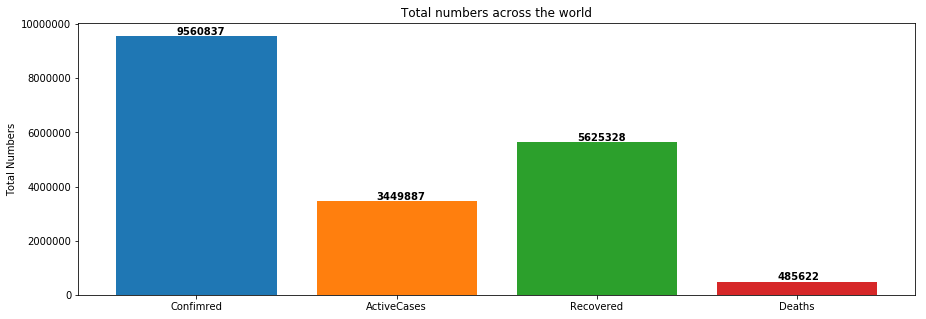

In [29]:
fig, ax = plt.subplots(figsize=(15,5))

ax.get_yaxis().get_major_formatter().set_scientific(False)

# Add a bar for the total confimred cases column 
ax.bar("Confimred", world_df['TotalCases'].sum())
plt.text(-.1, world_df['TotalCases'].sum() + 50000, str(world_df['TotalCases'].sum()),fontweight='bold')

# Add a bar for the total active cases column 
ax.bar("ActiveCases", world_df['ActiveCases'].sum())
plt.text(-.1+1, world_df['ActiveCases'].sum() + 50000, str(world_df['ActiveCases'].sum()),fontweight='bold')

# Add a bar for the total recovered cases column 
ax.bar("Recovered", world_df['TotalRecovered'].sum())
plt.text(-.1+2, world_df['TotalRecovered'].sum() + 50000, str(world_df['TotalRecovered'].sum()),fontweight='bold')

# Add a bar for the total deaths column 
ax.bar("Deaths", world_df['TotalDeaths'].sum())
plt.text(-.1+3, world_df['TotalDeaths'].sum() + 50000, str(world_df['TotalDeaths'].sum()),fontweight='bold')
# Label the y-axis
ax.set_ylabel("Total Numbers")

# Plot title
plt.title('Total numbers across the world')

plt.show()

Plotting the 20 worst hit countries in terms of confirmed Covid cases.

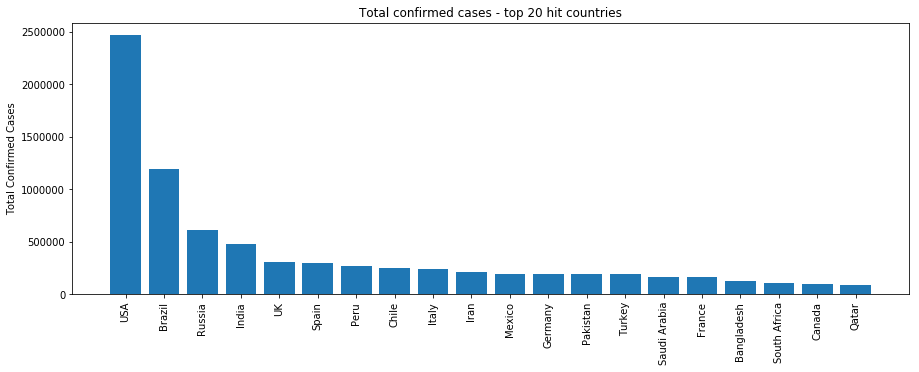

In [30]:
df = world_df_m.sort_values('TotalCases', ascending=False).set_index('Country').fillna(0)

#rcParams['figure.figsize'] = 15, 5
fig, ax = plt.subplots(figsize=(15,5))

# Plot a bar-chart of total confirmed cases as a function of country
ax.bar(df.index,df['TotalCases'])

# Set the x-axis tick labels to the country names
ax.set_xticklabels(df.index, rotation = 90)

# Set the y-axis label
ax.set_ylabel("Total Confirmed Cases")

# Plot title
plt.title('Total confirmed cases - top 20 hit countries')

plt.show()

We see USA outweighs all other countries by a significant number and dominates the plot, thus is the worst hit country. If we look at the below boxplot which compares the distribution of actives case, deaths and recovered cases, we can clearly see the far out outlier is USA thus confirming how badly it is hit.

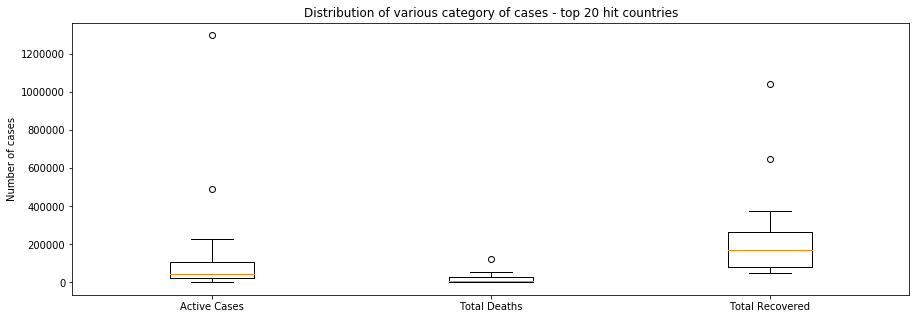

In [31]:
fig, ax = plt.subplots(figsize=(15,5))

# Plot a histogram of "Weight" for mens_rowing
ax.boxplot([df['ActiveCases'],df['TotalDeaths'],df['TotalRecovered']])

ax.set_ylabel("Number of cases")
# Add x-axis tick labels:
ax.set_xticklabels(['Active Cases', 'Total Deaths','Total Recovered'])

# Plot title
plt.title('Distribution of various category of cases - top 20 hit countries')

plt.show()

Let's look at the total deaths occured so far.

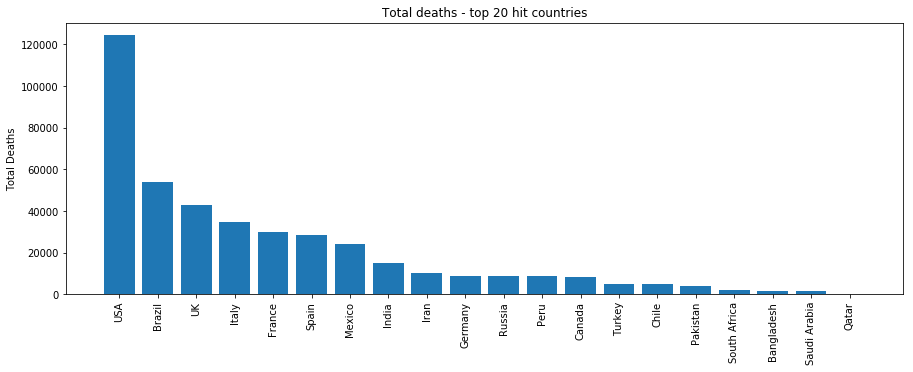

In [32]:
fig, ax = plt.subplots(figsize=(15,5))

df = df.sort_values('TotalDeaths', ascending=False).fillna(0)

# Plot a bar-chart of total deaths as a function of country
ax.bar(df.index,df['TotalDeaths'])

# Set the x-axis tick labels to the country names
ax.set_xticklabels(df.index, rotation = 90)

# Set the y-axis label
ax.set_ylabel("Total Deaths")

# Plot title
plt.title('Total deaths - top 20 hit countries')

plt.show()

Again, as expected USA is worst. Now, let's see the number of cases recovered so far from Covid-19

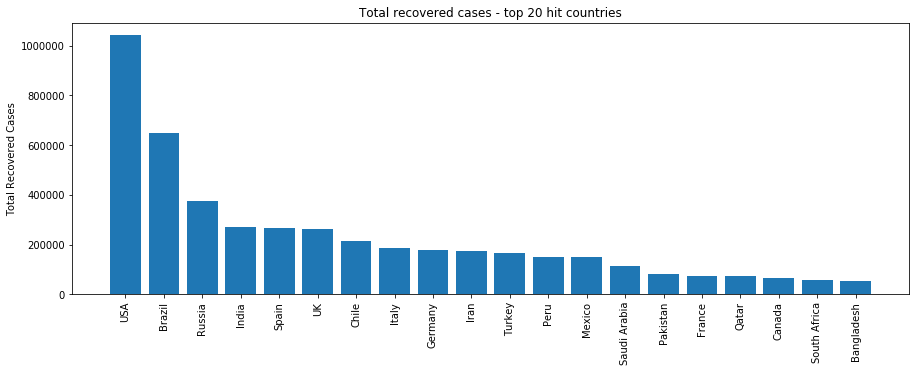

In [33]:
fig, ax = plt.subplots(figsize=(15,5))
df = df.sort_values('TotalRecovered', ascending=False).fillna(0)

# Plot a bar-chart of total recovered cases as a function of country
ax.bar(df.index,df['TotalRecovered'])

# Set the x-axis tick labels to the country names
ax.set_xticklabels(df.index, rotation = 90)

# Set the y-axis label
ax.set_ylabel("Total Recovered Cases")

# Plot title
plt.title('Total recovered cases - top 20 hit countries')

plt.show()

Though, as one can guess USA tops the list, other countries are not very far behind. This shows that compared to USA, other countries are doing better in terms of recovery.

We will also create a new column 'Dead_to_Recovered', which is a percentage number of 'TotalDeaths' to 'TotalRecovered'

In [34]:
df_m = world_df.copy()
df_m['Dead_to_Recovered'] = 100*df_m['TotalDeaths']/df_m['TotalRecovered']
df_m = df_m.head(20)
df_m

,Country,ActiveCases,TotalRecovered,TotalDeaths,TotalCases,Dead_to_Recovered
0,USA,1298536,1040608,124294,2463438,11.944363
1,Brazil,489806,649908,53895,1193609,8.292712
2,Russia,230225,375164,8605,613994,2.293664
3,India,187288,272382,14915,474585,5.475766
4,UK,0,263781,43081,306862,16.332109
5,Spain,0,265839,28327,294166,10.655698
6,Peru,104514,151589,8586,264689,5.663999
7,Chile,34592,215093,4731,254416,2.199514
8,Italy,18655,186111,34644,239410,18.614698
9,Iran,29863,175103,10130,215096,5.785166


We can look at Dead_to_Recovered, which measures the immunity levels of people or the effective treatment that infected people are receiving. This can be measured by looking at how many people died when compared to how many people recovered.

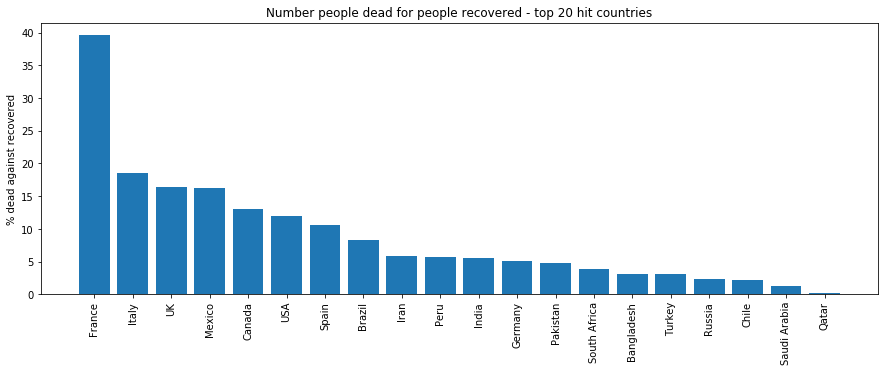

In [35]:
df_s = df_m.set_index('Country').sort_values('Dead_to_Recovered',ascending=False)

fig, ax = plt.subplots(figsize=(15,5))

# Plot a bar-chart of dead to recovered as a function of country
ax.bar(df_s.index,df_s['Dead_to_Recovered'])

# Set the x-axis tick labels to the country names
ax.set_xticklabels(df_s.index, rotation = 90)

# Set the y-axis label
ax.set_ylabel("% dead against recovered")

# Plot title

plt.title('Number people dead for people recovered - top 20 hit countries')
plt.show()


We can see from the plot, most of the European and American countries are doing bad on recovery.

## Web Scrapping the India Dataset

In [36]:
response = requests.get(india_url)
print(response)

<Response [200]>


In [37]:
soup = BeautifulSoup(response.content,'html.parser')
soup.title

<title>MoHFW | Home</title>

In [38]:
ct = soup.find('table')

In [39]:
state = []
total_cases = []
deaths = []
recovered = []
active_cases = []
rows = ct.find_all('tr')[1:35]
for row in rows:
    col = row.find_all('td')
    state.append(col[1].text.strip())
    active_cases.append(col[2].text.strip())
    recovered.append(col[3].text.strip())
    deaths.append(col[4].text.strip())
    total_cases.append(col[5].text.strip())
    
print(state)

['Andaman and Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh', 'Dadra and Nagar Haveli and Daman and Diu', 'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttarakhand', 'Uttar Pradesh']


In [40]:
india_df = pd.DataFrame(list(zip(state,active_cases,recovered,deaths,total_cases)),columns=['State','ActiveCases','RecoveredCases','TotalDeaths','TotalCases'])

In [41]:
india_df

,State,ActiveCases,RecoveredCases,TotalDeaths,TotalCases
0,Andaman and Nicobar Islands,13,43,0,56
1,Andhra Pradesh,5428,4779,124,10331
2,Arunachal Pradesh,120,38,0,158
3,Assam,2231,3958,9,6198
4,Bihar,2039,6113,57,8209
5,Chandigarh,91,323,6,420
6,Chhattisgarh,780,1627,12,2419
7,Dadra and Nagar Haveli and Daman and Diu,90,30,0,120
8,Delhi,26588,41437,2365,70390
9,Goa,660,289,2,951


In [42]:
india_df.dtypes

State             object
ActiveCases       object
RecoveredCases    object
TotalDeaths       object
TotalCases        object
dtype: object

In [43]:
# Check for duplicated values in the State column

india_df.State.duplicated().sum()

0

In [44]:
india_df.isnull().sum()

State             0
ActiveCases       0
RecoveredCases    0
TotalDeaths       0
TotalCases        0
dtype: int64

In [45]:
# Convert into integer from object type

india_df.ActiveCases = india_df.ActiveCases.astype(int)
india_df.RecoveredCases = india_df.RecoveredCases.astype(int)
india_df.TotalDeaths = india_df.TotalDeaths.astype(int)
india_df.TotalCases = india_df.TotalCases.astype(int)

In [46]:
india_df.dtypes

State             object
ActiveCases        int32
RecoveredCases     int32
TotalDeaths        int32
TotalCases         int32
dtype: object

This dataset does not require cleaning

## Data Analysis

In [47]:
india_df.sort_values(by=['TotalCases'],ascending=False,inplace=True)
india_df.head()

,State,ActiveCases,RecoveredCases,TotalDeaths,TotalCases
19,Maharashtra,62369,73792,6739,142900
8,Delhi,26588,41437,2365,70390
29,Tamil Nadu,28839,37763,866,67468
10,Gujarat,6120,21088,1735,28943
33,Uttar Pradesh,6375,12586,596,19557


Let's Look at the overall status of every state in India

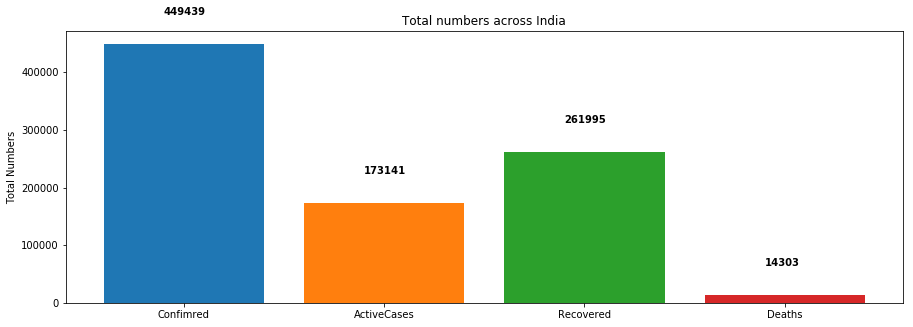

In [48]:
fig, ax = plt.subplots(figsize=(15,5))

ax.get_yaxis().get_major_formatter().set_scientific(False)

# Add a bar for the total confimred cases column 
ax.bar("Confimred", india_df['TotalCases'].sum())
plt.text(-.1, india_df['TotalCases'].sum() + 50000, str(india_df['TotalCases'].sum()),fontweight='bold')

# Add a bar for the total active cases column 
ax.bar("ActiveCases", india_df['ActiveCases'].sum())
plt.text(-.1+1, india_df['ActiveCases'].sum() + 50000, str(india_df['ActiveCases'].sum()),fontweight='bold')

# Add a bar for the total recovered cases column 
ax.bar("Recovered", india_df['RecoveredCases'].sum())
plt.text(-.1+2, india_df['RecoveredCases'].sum() + 50000, str(india_df['RecoveredCases'].sum()),fontweight='bold')

# Add a bar for the total deaths column 
ax.bar("Deaths", india_df['TotalDeaths'].sum())
plt.text(-.1+3, india_df['TotalDeaths'].sum() + 50000, str(india_df['TotalDeaths'].sum()),fontweight='bold')
# Label the y-axis
ax.set_ylabel("Total Numbers")

# Plot title
plt.title('Total numbers across India')

plt.show()

Plotting the Total number of Cases against the states

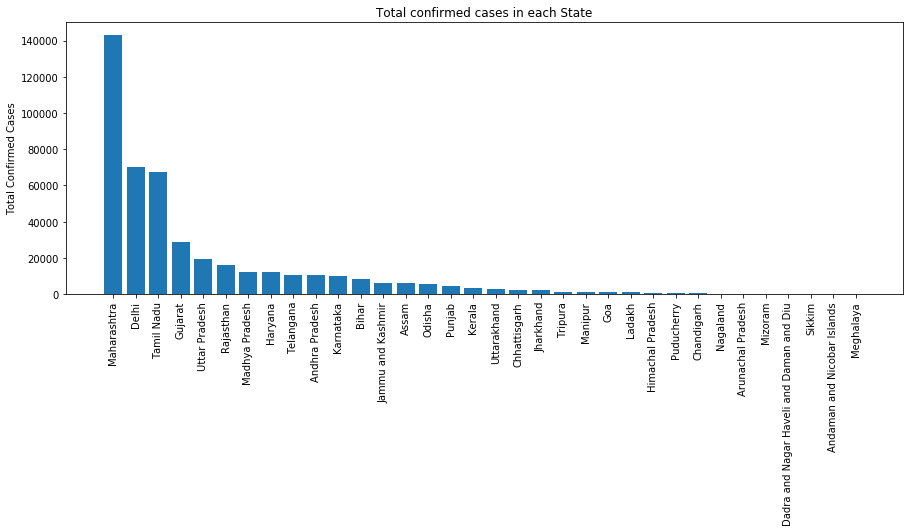

In [49]:
df = india_df.sort_values('TotalCases', ascending=False).set_index('State').fillna(0)

#rcParams['figure.figsize'] = 15, 5
fig, ax = plt.subplots(figsize=(15,5))

# Plot a bar-chart of total confirmed cases as a function of country
ax.bar(df.index,df['TotalCases'])

# Set the x-axis tick labels to the country names
ax.set_xticklabels(df.index, rotation = 90)

# Set the y-axis label
ax.set_ylabel("Total Confirmed Cases")

# Plot title
plt.title('Total confirmed cases in each State')

plt.show()

We see Maharashtra outweighs all other states by a significant number and dominates the plot, thus is the worst hit state. If we look at the below boxplot which compares the distribution of actives case, deaths and recovered cases, we can clearly see the far out outlier is Maharastra thus confirming how badly it is hit.

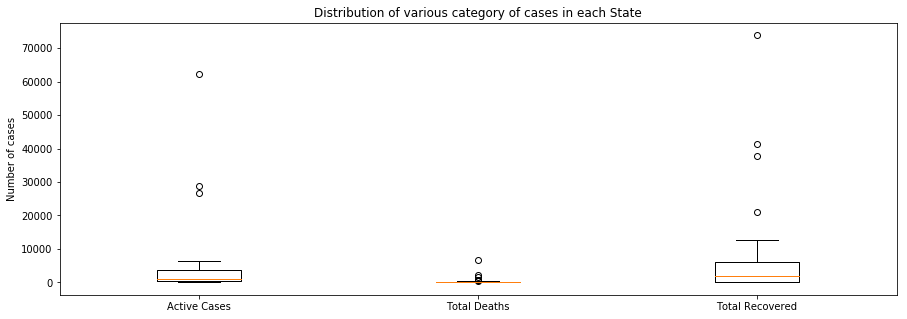

In [50]:
fig, ax = plt.subplots(figsize=(15,5))

# Plot a histogram of "Weight" for mens_rowing
ax.boxplot([df['ActiveCases'],df['TotalDeaths'],df['RecoveredCases']])

ax.set_ylabel("Number of cases")
# Add x-axis tick labels:
ax.set_xticklabels(['Active Cases', 'Total Deaths','Total Recovered'])

# Plot title
plt.title('Distribution of various category of cases in each State')

plt.show()

Let us look at the total deaths in each state

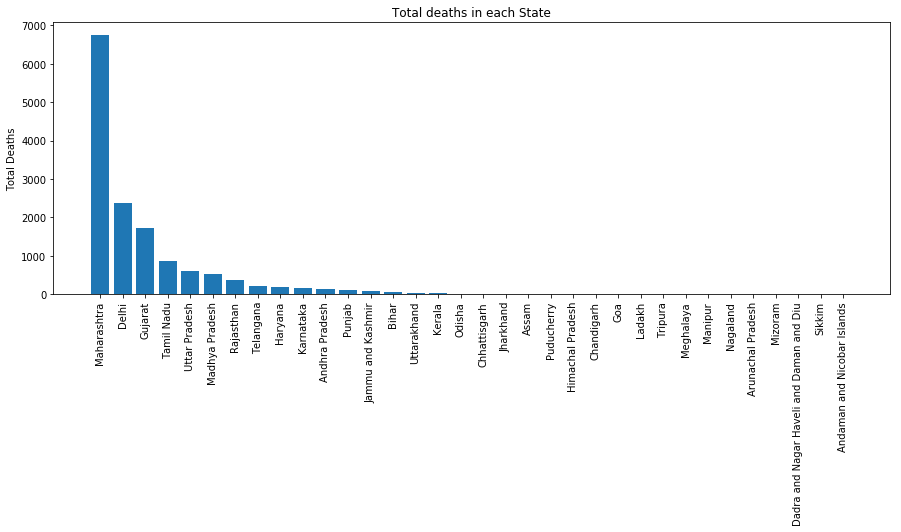

In [51]:
fig, ax = plt.subplots(figsize=(15,5))

df = df.sort_values('TotalDeaths', ascending=False).fillna(0)

# Plot a bar-chart of total deaths as a function of country
ax.bar(df.index,df['TotalDeaths'])

# Set the x-axis tick labels to the country names
ax.set_xticklabels(df.index, rotation = 90)

# Set the y-axis label
ax.set_ylabel("Total Deaths")

# Plot title
plt.title('Total deaths in each State')

plt.show()

Again, Maharashtra is the worst. Then we see the number of cases recovered so far from Covid-19

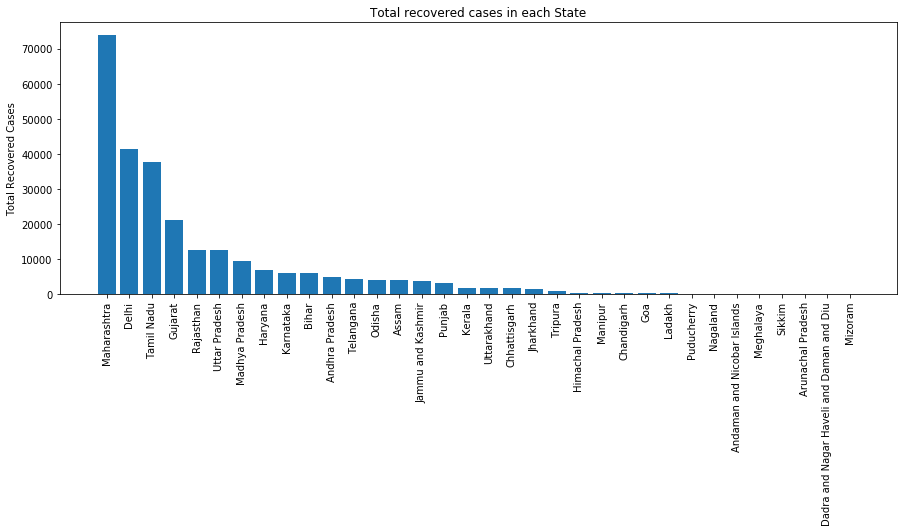

In [52]:
fig, ax = plt.subplots(figsize=(15,5))
df = df.sort_values('RecoveredCases', ascending=False).fillna(0)

# Plot a bar-chart of total recovered cases as a function of country
ax.bar(df.index,df['RecoveredCases'])

# Set the x-axis tick labels to the country names
ax.set_xticklabels(df.index, rotation = 90)

# Set the y-axis label
ax.set_ylabel("Total Recovered Cases")

# Plot title
plt.title('Total recovered cases in each State')

plt.show()

Though, as one can guess Maharashtra tops the list, other states like Delhi, Tamil Nadu, Gujarat are not very far behind. This shows that compared to Maharashtra, other states are doing better in terms of recovery.

We will also create a new column 'Dead_to_Recovered', which is a percentage number of 'TotalDeaths' to 'TotalRecovered'

In [53]:
df_m = india_df.copy()
df_m['Dead_to_Recovered'] = 100*df_m['TotalDeaths']/df_m['RecoveredCases']
df_m

,State,ActiveCases,RecoveredCases,TotalDeaths,TotalCases,Dead_to_Recovered
19,Maharashtra,62369,73792,6739,142900,9.132426
8,Delhi,26588,41437,2365,70390,5.707460
29,Tamil Nadu,28839,37763,866,67468,2.293250
10,Gujarat,6120,21088,1735,28943,8.227428
33,Uttar Pradesh,6375,12586,596,19557,4.735420
27,Rajasthan,3023,12611,375,16009,2.973594
18,Madhya Pradesh,2441,9473,534,12448,5.637074
11,Haryana,4897,6925,188,12010,2.714801
30,Telangana,5858,4361,225,10444,5.159367
1,Andhra Pradesh,5428,4779,124,10331,2.594685


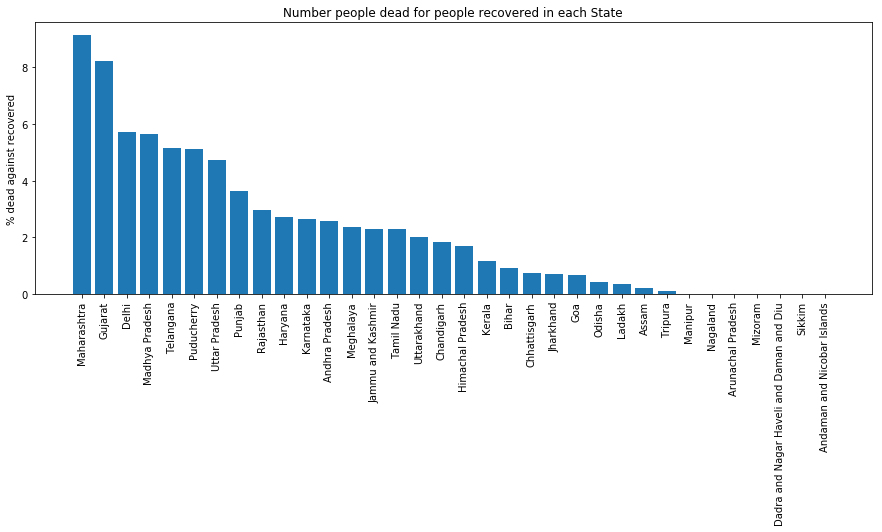

In [54]:
df_s = df_m.set_index('State').sort_values('Dead_to_Recovered',ascending=False)

fig, ax = plt.subplots(figsize=(15,5))

# Plot a bar-chart of dead to recovered as a function of country
ax.bar(df_s.index,df_s['Dead_to_Recovered'])

# Set the x-axis tick labels to the country names
ax.set_xticklabels(df_s.index, rotation = 90)

# Set the y-axis label
ax.set_ylabel("% dead against recovered")

# Plot title

plt.title('Number people dead for people recovered in each State')
plt.show()